In [1]:
import matplotlib.pylab as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
import  intake
import healpy as hp

In [2]:
grid = xr.open_dataset("../grid.nc")

In [3]:
import os
import pickle
import types

import numpy as np


def grid_selection(
    grid,
    lats=types.MappingProxyType({"lats": [11, 15]}),
    lons=types.MappingProxyType({"lons": [-59.3, -55.3]}),
):
    # Subsection
    x_range = lons
    y_range = lats

    # Create grid-mask
    cell = (
        (grid.clat.values >= np.deg2rad(y_range[0]))
        & (grid.clat.values <= np.deg2rad
           (y_range[1]))
        & (grid.clon.values >= np.deg2rad(x_range[0]))
        & (grid.clon.values <= np.deg2rad(x_range[1]))
    )

    return cell

Label(value='Click on the plot to see the index and value.')

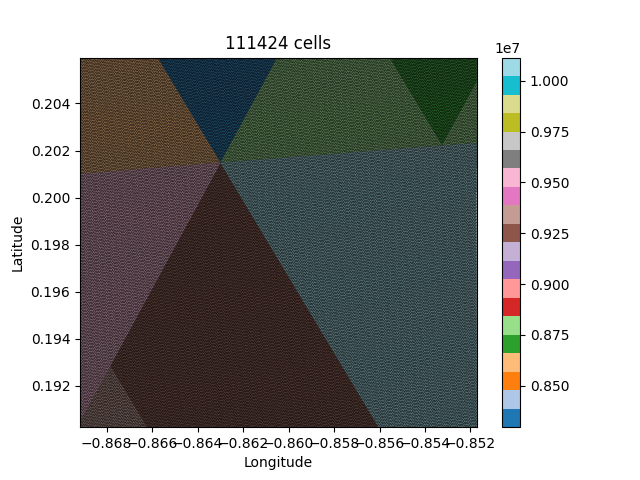

In [157]:
lats= [10.9, 11.8]
lons= [-49.8, -48.8]
cells = grid_selection(grid, lats=lats, lons=lons)
voc = grid.vertex_of_cell[:,cells] - 1

%matplotlib widget
import matplotlib.tri as tri

import ipywidgets as widgets
from IPython.display import display

# Create a triangulation object
triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)

info_text = widgets.Label(value="Click on the plot to see the index and value.")

# Plot using tripcolor
fig, ax = plt.subplots()
tripcolor = ax.tripcolor(triang, np.arange(len(cells))[cells], cmap='tab20', edgecolors='black')  # Quickly alternating colormap
plt.colorbar(tripcolor, ax=ax)
plt.title(f"{sum(cells)} cells")

# Enable interactive zoom
ax.set_navigate(True)
ax.set_title(f"{sum(cells)} cells")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_ylim(np.deg2rad(lats))
ax.set_xlim(np.deg2rad(lons))

# Define the click event handler
def on_click(event):
    if event.inaxes is not None:
        # Get the clicked coordinates
        x, y = event.xdata, event.ydata
        # Find the triangle containing the clicked point
        triangle_index = triang.get_trifinder()(x, y)
        if triangle_index != -1:  # Check if a triangle was found
            cell_number = np.where(cells)[0][triangle_index]  # Map back to the original cell number
            info_text.value = f"Original Cell Index: {cell_number}"
        else:
            info_text.value = "Clicked outside any triangle."

# Connect the click event to the function
display(info_text)
fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()

In [161]:
import matplotlib.tri as tri

# Create a triangulation object
sg1 = grid.isel(cell=slice(10051156-16*16*15, 10051156-16*16*15+ 16*16*16*16))
voc = sg1.vertex_of_cell - 1
triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)

# Plot using tripcolor
plt.tripcolor(triang, np.arange(len(voc[0,:])), cmap='Reds_r')  #np.random.rand(len(triang.triangles))
plt.colorbar()

In [162]:
10051156-16*16*15

10047316

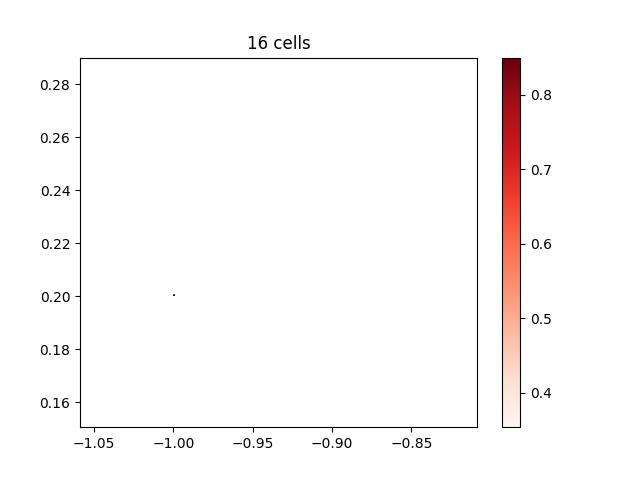

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 1
triangles_to_show = 2

# Lists to accumulate triangles and colors
all_triangles = []
all_colors = []

for i, common_triangle in enumerate(np.arange(5356061, 5356061 + (16**level)*triangles_to_show, 16**level, dtype=int)):
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = sg1.vertex_of_cell - 1
    triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)
    
    # Generate a unique random color for this set of triangles
    colors = np.full(len(triang.triangles),np.random.rand())
    
    # Append triangles and colors to the lists
    all_triangles.append(triang)
    all_colors.append(colors)

# Concatenate all triangles and colors
all_triangles = np.concatenate([t.triangles for t in all_triangles])
all_colors = np.concatenate(all_colors)

# Create a new triangulation for all triangles
combined_triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=all_triangles)

# Plot all triangles at once
tripcolor = ax.tripcolor(combined_triang, facecolors=all_colors, edgecolors='black', cmap='Reds')
plt.colorbar(tripcolor, ax=ax)
plt.title(f"{cells_per_triangle} cells")

plt.show()


cell 5341227 could be center cell

a triangle = slice(5341213, 5341213+ 16))

next larger triangle = slice(5341213, 5341213+ 16*16)

next larger trianlge = slice(5339677, 5339677+ 16*16*16)

next larger triangle = slice(5356061, 5356061+ 16*16*16*16)


at other location = 6298736

In [9]:
11316601+16*16*16

11320697

/var/folders/fj/g0x4n_f15tb6zfwjhzc8gvzr0000gn/T/ipykernel_62184/3415612539.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


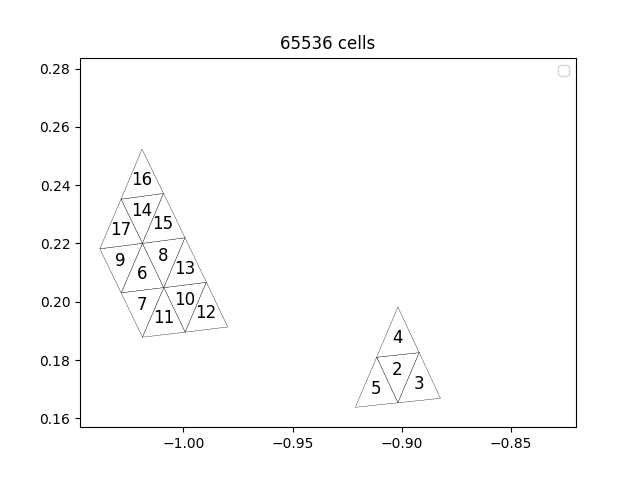

In [10]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the coarsening function
def coarsen_vertex_of_cell(voc):
    return voc.reshape(3, -1, 4)[1, :, 1:].T

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 20

# Loop through each iteration
for i, common_triangle in enumerate(np.arange(4766237, 4766237 + (16**level) * triangles_to_show, 16**level, dtype=int)):
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = (sg1.vertex_of_cell - 1).T.values  # Get the vertex of cell indices
    voc, counts = np.unique(voc.reshape(-1), return_counts=True)
    encompassing_voc = np.array([voc[np.where(counts == 1)]])
    try:
        triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=encompassing_voc)  # Create a new triangulation
    except ValueError:
        continue

    # Plot the new triangles
    color = np.random.rand()
    ax.tripcolor(triang, edgecolor='black', facecolors=[color], cmap='Greys')  # Draw the edges of the triangles

    # Label the area
    centroid_x = triang.x[encompassing_voc].mean()
    centroid_y = triang.y[encompassing_voc].mean()
    ax.text(centroid_x, centroid_y, f'{i+1}', fontsize=12, ha='center', va='center', color='black')

# Set plot limits and title
ax.set_xlim(np.min(grid.vlon), np.max(grid.vlon))
ax.set_ylim(np.min(grid.vlat), np.max(grid.vlat))
plt.title(f"{cells_per_triangle} cells")
plt.legend()
plt.show()


/var/folders/fj/g0x4n_f15tb6zfwjhzc8gvzr0000gn/T/ipykernel_62184/2123705701.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


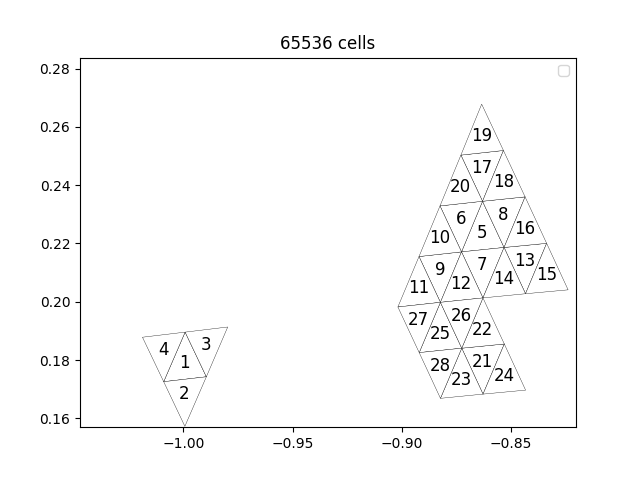

In [25]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the coarsening function
def coarsen_vertex_of_cell(voc):
    return voc.reshape(3, -1, 4)[1, :, 1:].T

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 60

# Loop through each iteration
for i, common_triangle in enumerate(np.arange(7869523, 7869523 + (16**level) * triangles_to_show, 16**level, dtype=int)):
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = (sg1.vertex_of_cell - 1).T.values  # Get the vertex of cell indices
    voc, counts = np.unique(voc.reshape(-1), return_counts=True)
    encompassing_voc = np.array([voc[np.where(counts == 1)]])
    try:
        triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=encompassing_voc)  # Create a new triangulation
    except ValueError:
        continue

    # Plot the new triangles
    color = np.random.rand()
    ax.tripcolor(triang, edgecolor='black', facecolors=[color], cmap='Greys')  # Draw the edges of the triangles

    # Label the area
    centroid_x = triang.x[encompassing_voc].mean()
    centroid_y = triang.y[encompassing_voc].mean()
    ax.text(centroid_x, centroid_y, f'{i+1}', fontsize=12, ha='center', va='center', color='black')

# Set plot limits and title
ax.set_xlim(np.min(grid.vlon), np.max(grid.vlon))
ax.set_ylim(np.min(grid.vlat), np.max(grid.vlat))
plt.title(f"{cells_per_triangle} cells")
plt.legend()
plt.show()


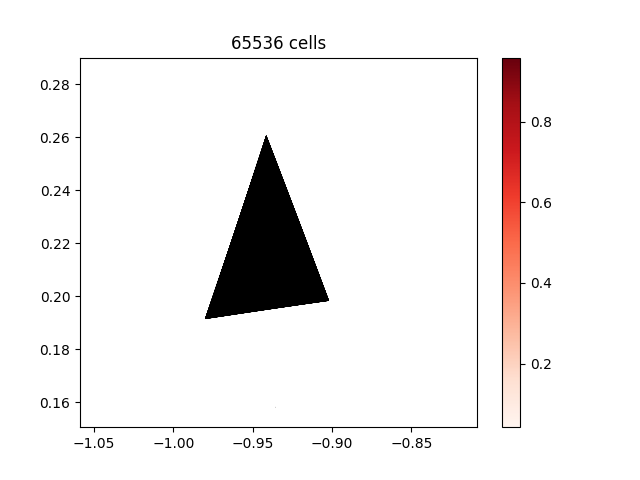

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 16

# Lists to accumulate triangles and colors
all_triangles = []
all_colors = []

for i, common_triangle in enumerate(np.arange(3344491, 3344491 + (16**level)*triangles_to_show, 16**level, dtype=int)):
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = sg1.vertex_of_cell - 1
    triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)
    
    # Generate a unique random color for this set of triangles
    colors = np.full(len(triang.triangles),np.random.rand())
    
    # Append triangles and colors to the lists
    all_triangles.append(triang)
    all_colors.append(colors)

# Concatenate all triangles and colors
all_triangles = np.concatenate([t.triangles for t in all_triangles])
all_colors = np.concatenate(all_colors)

# Create a new triangulation for all triangles
combined_triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=all_triangles)

# Plot all triangles at once
tripcolor = ax.tripcolor(combined_triang, facecolors=all_colors, edgecolors='black', cmap='Reds')
plt.colorbar(tripcolor, ax=ax)
plt.title(f"{cells_per_triangle} cells")

plt.show()


/var/folders/fj/g0x4n_f15tb6zfwjhzc8gvzr0000gn/T/ipykernel_62184/2354822050.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


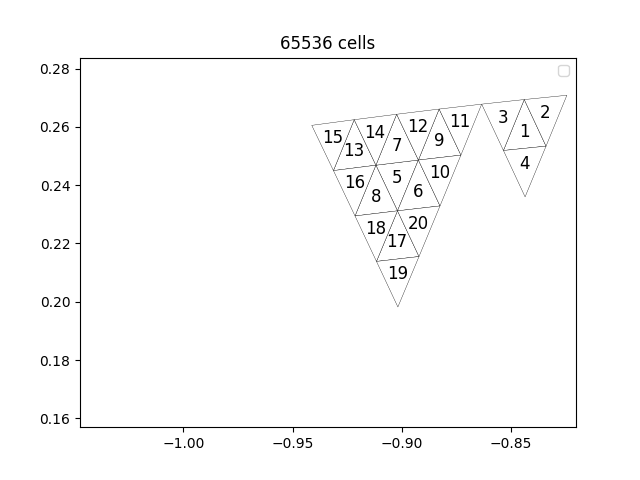

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the coarsening function
def coarsen_vertex_of_cell(voc):
    return voc.reshape(3, -1, 4)[1, :, 1:].T

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 40

# Loop through each iteration
for i, common_triangle in enumerate(np.arange(10468729, 10468729 + (16**level) * triangles_to_show, 16**level, dtype=int)):
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = (sg1.vertex_of_cell - 1).T.values  # Get the vertex of cell indices
    voc, counts = np.unique(voc.reshape(-1), return_counts=True)
    encompassing_voc = np.array([voc[np.where(counts == 1)]])
    try:
        triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=encompassing_voc)  # Create a new triangulation
    except ValueError:
        continue

    # Plot the new triangles
    color = np.random.rand()
    ax.tripcolor(triang, edgecolor='black', facecolors=[color], cmap='Greys')  # Draw the edges of the triangles

    # Label the area
    centroid_x = triang.x[encompassing_voc].mean()
    centroid_y = triang.y[encompassing_voc].mean()
    ax.text(centroid_x, centroid_y, f'{i+1}', fontsize=12, ha='center', va='center', color='black')

# Set plot limits and title
ax.set_xlim(np.min(grid.vlon), np.max(grid.vlon))
ax.set_ylim(np.min(grid.vlat), np.max(grid.vlat))
plt.title(f"{cells_per_triangle} cells")
plt.legend()
plt.show()


/var/folders/fj/g0x4n_f15tb6zfwjhzc8gvzr0000gn/T/ipykernel_62184/1963947446.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


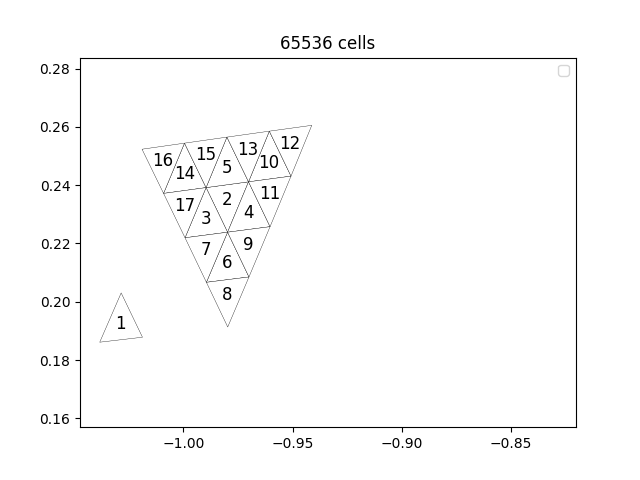

In [14]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the coarsening function
def coarsen_vertex_of_cell(voc):
    return voc.reshape(3, -1, 4)[1, :, 1:].T

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 40

# Loop through each iteration
for i, common_triangle in enumerate(np.arange(6034032, 6034032 + (16**level) * triangles_to_show, 16**level, dtype=int)): # -(16**level)*N
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = (sg1.vertex_of_cell - 1).T.values  # Get the vertex of cell indices
    voc, counts = np.unique(voc.reshape(-1), return_counts=True)
    encompassing_voc = np.array([voc[np.where(counts == 1)]])
    try:
        triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=encompassing_voc)  # Create a new triangulation
    except ValueError:
        continue

    # Plot the new triangles
    color = np.random.rand()
    ax.tripcolor(triang, edgecolor='black', facecolors=[color], cmap='Greys')  # Draw the edges of the triangles

    # Label the area
    centroid_x = triang.x[encompassing_voc].mean()
    centroid_y = triang.y[encompassing_voc].mean()
    ax.text(centroid_x, centroid_y, f'{i+1}', fontsize=12, ha='center', va='center', color='black')

# Set plot limits and title
ax.set_xlim(np.min(grid.vlon), np.max(grid.vlon))
ax.set_ylim(np.min(grid.vlat), np.max(grid.vlat))
plt.title(f"{cells_per_triangle} cells")
plt.legend()
plt.show()

/var/folders/fj/g0x4n_f15tb6zfwjhzc8gvzr0000gn/T/ipykernel_62184/2925448281.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


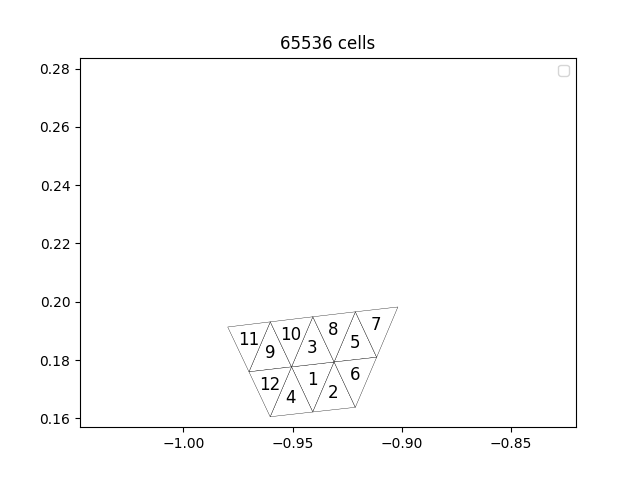

In [15]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the coarsening function
def coarsen_vertex_of_cell(voc):
    return voc.reshape(3, -1, 4)[1, :, 1:].T

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 15

# Loop through each iteration
for i, common_triangle in enumerate(np.arange(2484500, 2484500 + (16**level) * triangles_to_show, 16**level, dtype=int)): # -(16**level)*N
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = (sg1.vertex_of_cell - 1).T.values  # Get the vertex of cell indices
    parents = sg1.parent_cell_index.values
    voc, counts = np.unique(voc.reshape(-1), return_counts=True)
    encompassing_voc = np.array([voc[np.where(counts == 1)]])
    try:
        triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=encompassing_voc)  # Create a new triangulation
    except ValueError:
        continue

    # Plot the new triangles
    color = np.random.rand()
    ax.tripcolor(triang, edgecolor='black', facecolors=[color], cmap='Greys')  # Draw the edges of the triangles

    # Label the area
    centroid_x = triang.x[encompassing_voc].mean()
    centroid_y = triang.y[encompassing_voc].mean()
    ax.text(centroid_x, centroid_y, f'{i+1}', fontsize=12, ha='center', va='center', color='black')

# Set plot limits and title
ax.set_xlim(np.min(grid.vlon), np.max(grid.vlon))
ax.set_ylim(np.min(grid.vlat), np.max(grid.vlat))
plt.title(f"{cells_per_triangle} cells")
plt.legend()
plt.show()

/var/folders/fj/g0x4n_f15tb6zfwjhzc8gvzr0000gn/T/ipykernel_62184/2582701655.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


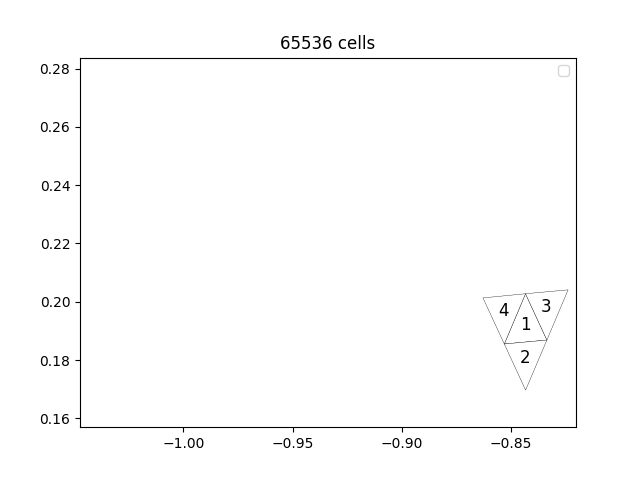

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 16

# Loop through each iteration
for i, common_triangle in enumerate(np.arange(9851502, 9851502 + (16**level) * triangles_to_show, 16**level, dtype=int)): # -(16**level)*N
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = (sg1.vertex_of_cell - 1).T.values  # Get the vertex of cell indices
    parents = sg1.parent_cell_index.values
    voc, counts = np.unique(voc.reshape(-1), return_counts=True)
    encompassing_voc = np.array([voc[np.where(counts == 1)]])
    try:
        triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=encompassing_voc)  # Create a new triangulation
    except ValueError:
        continue

    # Plot the new triangles
    color = np.random.rand()
    ax.tripcolor(triang, edgecolor='black', facecolors=[color], cmap='Greys')  # Draw the edges of the triangles

    # Label the area
    centroid_x = triang.x[encompassing_voc].mean()
    centroid_y = triang.y[encompassing_voc].mean()
    ax.text(centroid_x, centroid_y, f'{i+1}', fontsize=12, ha='center', va='center', color='black')

# Set plot limits and title
ax.set_xlim(np.min(grid.vlon), np.max(grid.vlon))
ax.set_ylim(np.min(grid.vlat), np.max(grid.vlat))
plt.title(f"{cells_per_triangle} cells")
plt.legend()
plt.show()

/var/folders/fj/g0x4n_f15tb6zfwjhzc8gvzr0000gn/T/ipykernel_62184/2352965287.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


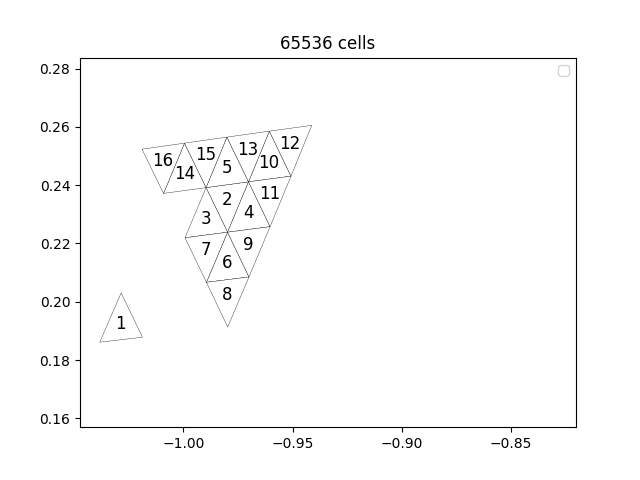

In [190]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 16

# Loop through each iteration
for i, common_triangle in enumerate(np.arange(6034032, 6034032 + (16**level) * triangles_to_show, 16**level, dtype=int)): # -(16**level)*N
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = (sg1.vertex_of_cell - 1).T.values  # Get the vertex of cell indices
    parents = sg1.parent_cell_index.values
    voc, counts = np.unique(voc.reshape(-1), return_counts=True)
    encompassing_voc = np.array([voc[np.where(counts == 1)]])
    try:
        triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=encompassing_voc)  # Create a new triangulation
    except ValueError:
        continue

    # Plot the new triangles
    color = np.random.rand()
    ax.tripcolor(triang, edgecolor='black', facecolors=[color], cmap='Greys')  # Draw the edges of the triangles

    # Label the area
    centroid_x = triang.x[encompassing_voc].mean()
    centroid_y = triang.y[encompassing_voc].mean()
    ax.text(centroid_x, centroid_y, f'{i+1}', fontsize=12, ha='center', va='center', color='black')

# Set plot limits and title
ax.set_xlim(np.min(grid.vlon), np.max(grid.vlon))
ax.set_ylim(np.min(grid.vlat), np.max(grid.vlat))
plt.title(f"{cells_per_triangle} cells")
plt.legend()
plt.show()

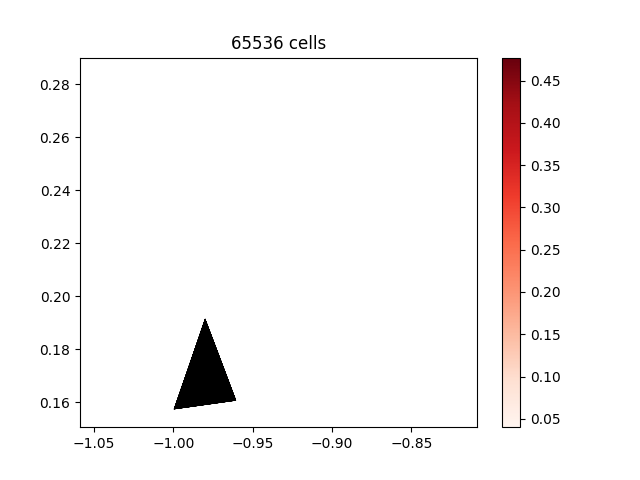

In [152]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 4

# Lists to accumulate triangles and colors
all_triangles = []
all_colors = []

for i, common_triangle in enumerate(np.arange(4550493-(16**level)*2, 4550493-(16**level)*2+ (16**level)*triangles_to_show, 16**level, dtype=int)):
# for i, common_triangle in enumerate(np.arange(3057940-(16**level)*4, 3057940-(16**level)*4 + (16**level)*triangles_to_show, 16**level, dtype=int)):
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = sg1.vertex_of_cell - 1
    triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)
    
    # Generate a unique random color for this set of triangles
    colors = np.full(len(triang.triangles),np.random.rand())
    
    # Append triangles and colors to the lists
    all_triangles.append(triang)
    all_colors.append(colors)

# Concatenate all triangles and colors
all_triangles = np.concatenate([t.triangles for t in all_triangles])
all_colors = np.concatenate(all_colors)

# Create a new triangulation for all triangles
combined_triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=all_triangles)

# Plot all triangles at once
tripcolor = ax.tripcolor(combined_triang, facecolors=all_colors, edgecolors='black', cmap='Reds')
plt.colorbar(tripcolor, ax=ax)
plt.title(f"{cells_per_triangle} cells")

plt.show()


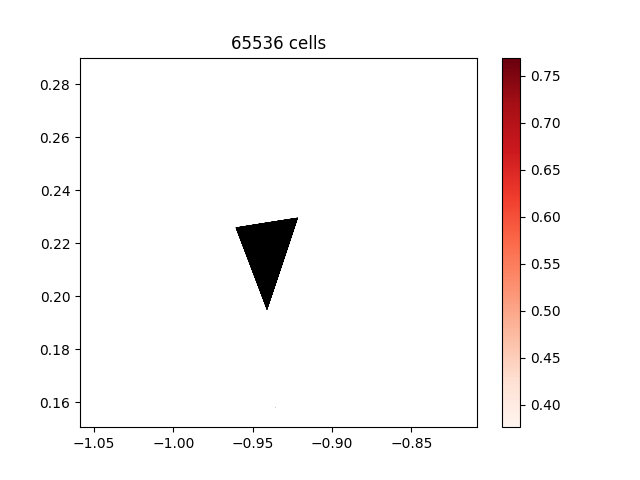

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
level = 4
triangles_to_show = 4

# Lists to accumulate triangles and colors
all_triangles = []
all_colors = []

for i, common_triangle in enumerate(np.arange(3344491, 3344491+ (16**level)*triangles_to_show, 16**level, dtype=int)):
# for i, common_triangle in enumerate(np.arange(3057940-(16**level)*4, 3057940-(16**level)*4 + (16**level)*triangles_to_show, 16**level, dtype=int)):
    sg1 = grid.isel(cell=slice(common_triangle, common_triangle + 16**level))
    if i == 0:
        cells_per_triangle = len(sg1.cell)
    voc = sg1.vertex_of_cell - 1
    triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)
    
    # Generate a unique random color for this set of triangles
    colors = np.full(len(triang.triangles),np.random.rand())
    
    # Append triangles and colors to the lists
    all_triangles.append(triang)
    all_colors.append(colors)

# Concatenate all triangles and colors
all_triangles = np.concatenate([t.triangles for t in all_triangles])
all_colors = np.concatenate(all_colors)

# Create a new triangulation for all triangles
combined_triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=all_triangles)

# Plot all triangles at once
tripcolor = ax.tripcolor(combined_triang, facecolors=all_colors, edgecolors='black', cmap='Reds')
plt.colorbar(tripcolor, ax=ax)
plt.title(f"{cells_per_triangle} cells")

plt.show()


In [174]:
10047316-(16**level)*3+794

9851502

In [479]:
2615572- (16**level)*2

2484500

In [ ]:
3344491+(16**4)*5

3672170

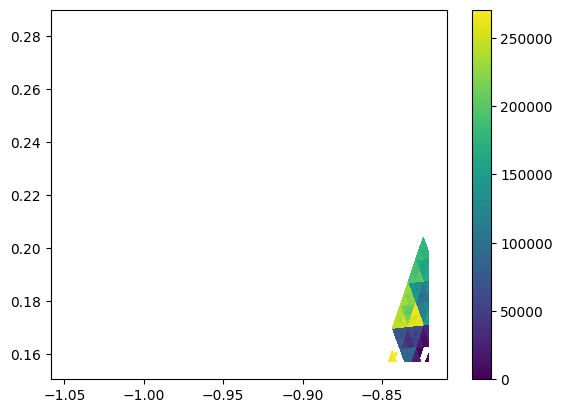

In [ ]:
import matplotlib.tri as tri

# Create a triangulation object
sg1 = grid.isel(cell=slice(120000, 5 ** (2 * 4)))
voc = sg1.vertex_of_cell - 1
triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)

# Plot using tripcolor
plt.tripcolor(triang, np.arange(len(voc[0,:])))  #np.random.rand(len(triang.triangles))
plt.colorbar()

The limited area model grid has a border, that is defined first with indices ranging from 0 to about 120000.

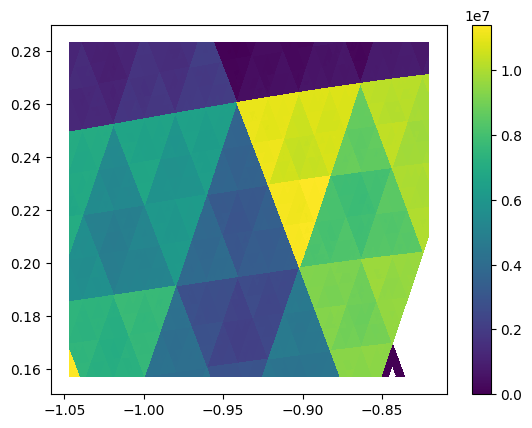

In [ ]:
import matplotlib.tri as tri

# Create a triangulation object
sg1 = grid.isel(cell=slice(5 ** (2 * 4), -1))
voc = sg1.vertex_of_cell - 1
triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)

# Plot using tripcolor
plt.tripcolor(triang, np.arange(len(voc[0,:])))  #np.random.rand(len(triang.triangles))
plt.colorbar()

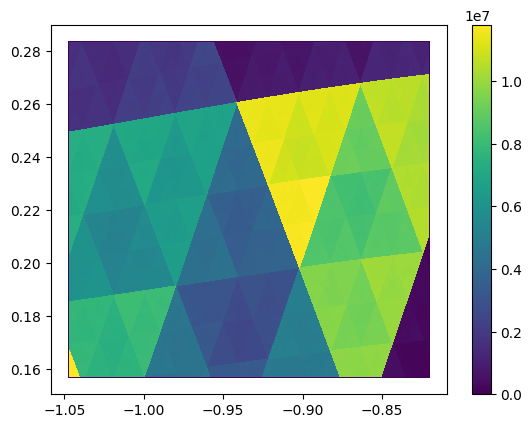

In [4]:
import matplotlib.tri as tri

# Create a triangulation object
sg1 = grid
voc = sg1.vertex_of_cell - 1
triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=voc.T)

# Plot using tripcolor
plt.tripcolor(triang, np.arange(len(voc[0,:])))  #np.random.rand(len(triang.triangles))
plt.colorbar()

Note, this is plotted on lat, lon, so it is distorted.

domain1
domain2
domain3
domain4
domain5
domain6
domain7
domain8
domain9
domain10
domain11
domain12
domain13


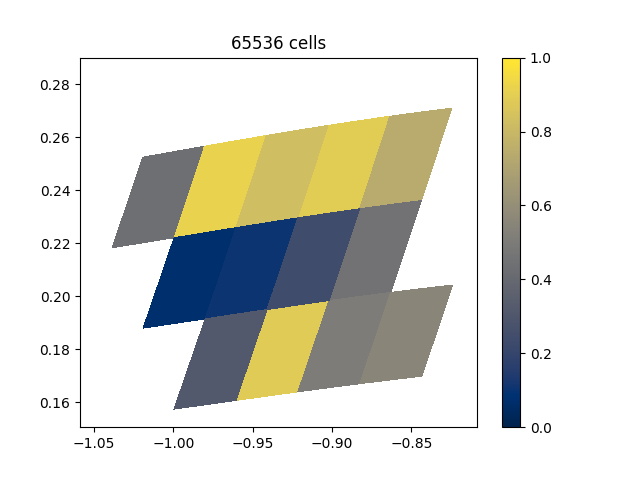

In [ ]:
## Deine domains:
level = 4
domains = {
    "domain1": {
        "cells": [slice(4766237 + (16**level) * 13, 4766237 + (16**level) * 14),
                  slice(4766237 + (16**level) * 14, 4766237 + (16**level) * 15),
                  slice(4766237 + (16**level) * 15, 4766237 + (16**level) * 16),
                  slice(4766237 + (16**level) * 16, 4766237 + (16**level) * 17),
                  slice(6034032 + (16**level) * 13, 6034032 + (16**level) * 14),
                  slice(6034032 + (16**level) * 14, 6034032 + (16**level) * 16),
                  slice(6034032 + (16**level) * 16, 6034032 + (16**level) * 17),
                  ],
    },
    "domain2": {
        "cells": [slice(6034032 + (16**level) * 1, 6034032 + (16**level) * 2),
                  slice(6034032 + (16**level) * 2, 6034032 + (16**level) * 3),
                  slice(6034032 + (16**level) * 3, 6034032 + (16**level) * 4),
                    slice(6034032 + (16**level) * 4, 6034032 + (16**level) * 5),
                    slice(6034032 + (16**level) * 9, 6034032 + (16**level) * 10),
                    slice(6034032 + (16**level) * 10, 6034032 + (16**level) * 11),
                    slice(6034032 + (16**level) * 11, 6034032 + (16**level) * 12),
                    slice(6034032 + (16**level) * 12, 6034032 + (16**level) * 13),
                  ]
    },
    "domain3": {
        "cells": [
            slice(6034032 + (16**level) * 5, 6034032 + (16**level) * 6),
            slice(6034032 + (16**level) * 6, 6034032 + (16**level) * 7),
            slice(6034032 + (16**level) * 7, 6034032 + (16**level) * 8),
            slice(6034032 + (16**level) * 8, 6034032 + (16**level) * 9),
            slice(4766237 + (16**level) * 9, 4766237 + (16**level) * 10),
            slice(4766237 + (16**level) * 10, 4766237 + (16**level) * 11),
            slice(4766237 + (16**level) * 11, 4766237 + (16**level) * 12),
            slice(4766237 + (16**level) * 12, 4766237 + (16**level) * 13),
        ]
    },
    "domain4": {
        "cells": [
            slice(10468729 + (16**level) * 4, 10468729 + (16**level) * 5),
            slice(10468729 + (16**level) * 5, 10468729 + (16**level) * 6),
            slice(10468729 + (16**level) * 6, 10468729 + (16**level) * 7),
            slice(10468729 + (16**level) * 7, 10468729 + (16**level) * 8),
            slice(10468729 + (16**level) * 8, 10468729 + (16**level) * 9),
            slice(10468729 + (16**level) * 9, 10468729 + (16**level) * 10),
            slice(10468729 + (16**level) * 10, 10468729 + (16**level) * 11),
            slice(10468729 + (16**level) * 11, 10468729 + (16**level) * 12),
        ]
    },
    "domain5": {
        "cells": [
            slice(10468729 + (16**level) * 0, 10468729 + (16**level) * 1),
            slice(10468729 + (16**level) * 1, 10468729 + (16**level) * 2),
            slice(10468729 + (16**level) * 2, 10468729 + (16**level) * 3),
            slice(10468729 + (16**level) * 3, 10468729 + (16**level) * 4),
            slice(7869523 + (16**level) *16, 7869523 + (16**level) *17),
            slice(7869523 + (16**level) *17, 7869523 + (16**level) *18),
            slice(7869523 + (16**level) *18, 7869523 + (16**level) *19),
            slice(7869523 + (16**level) *19, 7869523 + (16**level) *20),
        ]
    },    
    "domain6": {
        "cells": [
            slice(7869523 + (16**level) * 4, 7869523 + (16**level) * 5),
            slice(7869523 + (16**level) * 5, 7869523 + (16**level) * 6),
            slice(7869523 + (16**level) * 6, 7869523 + (16**level) * 7),
            slice(7869523 + (16**level) * 7, 7869523 + (16**level) * 8),
            slice(7869523 + (16**level) * 8, 7869523 + (16**level) * 9),
            slice(7869523 + (16**level) * 9, 7869523 + (16**level) * 10),
            slice(7869523 + (16**level) * 10, 7869523 + (16**level) * 11),
            slice(7869523 + (16**level) * 11, 7869523 + (16**level) * 12),
        ]
    },
    "domain7": {
        "cells": [
            slice(2484500 + (16**level) * 0, 2484500 + (16**level) * 1),
            slice(2484500 + (16**level) * 1, 2484500 + (16**level) * 2),
            slice(2484500 + (16**level) * 2, 2484500 + (16**level) * 3),
            slice(2484500 + (16**level) * 3, 2484500 + (16**level) * 4),
            slice(2484500 + (16**level) * 4, 2484500 + (16**level) * 5),
            slice(2484500 + (16**level) * 5, 2484500 + (16**level) * 6),
            slice(2484500 + (16**level) * 6, 2484500 + (16**level) * 7),
            slice(2484500 + (16**level) * 7, 2484500 + (16**level) * 8),
        ]
    },
    "domain8": {
        "cells": [
            slice(7869523 + (16**level) *24, 7869523 + (16**level) *25),
            slice(7869523 + (16**level) *25, 7869523 + (16**level) *26),
            slice(7869523 + (16**level) *26, 7869523 + (16**level) *27),
            slice(7869523 + (16**level) *27, 7869523 + (16**level) *28),
            slice(4766237 + (16**level) * 1, 4766237 + (16**level) * 2),
            slice(4766237 + (16**level) * 2, 4766237 + (16**level) * 3),
            slice(4766237 + (16**level) * 3, 4766237 + (16**level) * 4),
            slice(4766237 + (16**level) * 4, 4766237 + (16**level) * 5),
        ]
    },
    "domain9": {
        "cells": [
            slice(10468729 + (16**level) * 12, 10468729 + (16**level) * 13),
            slice(10468729 + (16**level) * 13, 10468729 + (16**level) * 14),
            slice(10468729 + (16**level) * 14, 10468729 + (16**level) * 15),
            slice(10468729 + (16**level) * 15, 10468729 + (16**level) * 16),
            slice(3344491 + (16**level) * 10, 3344491 + (16**level) * 11),
            slice(3344491 + (16**level) * 11, 3344491 + (16**level) * 12),
            slice(3344491 + (16**level) * 9, 3344491 + (16**level) * 10),
            slice(3344491 + (16**level) * 8, 3344491 + (16**level) * 9),
        ]
    },
    "domain10": {
        "cells": [
            slice(3344491 + (16**level) * 2, 3344491 + (16**level) * 3),
            slice(3344491 + (16**level) * 3, 3344491 + (16**level) * 4),
            slice(3344491 + (16**level) * 1, 3344491 + (16**level) * 2),
            slice(3344491 + (16**level) * 0, 3344491 + (16**level) * 1),
            slice(3344491 + (16**level) * 12, 3344491 + (16**level) * 13),
            slice(3344491 + (16**level) * 13, 3344491 + (16**level) * 14),
            slice(3344491 + (16**level) * 14, 3344491 + (16**level) * 15),
            slice(3344491 + (16**level) * 15, 3344491 + (16**level) * 16),
        ]
    },
    "domain11": {
        "cells": [
            slice(3344491 + (16**level) * 5, 3344491 + (16**level) * 6),
            slice(3344491 + (16**level) * 4, 3344491 + (16**level) * 5),
            slice(3344491 + (16**level) * 6, 3344491 + (16**level) * 7),
            slice(3344491 + (16**level) * 7, 3344491 + (16**level) * 8),
            slice(10468729 + (16**level) * 16, 10468729 + (16**level) * 17),
            slice(10468729 + (16**level) * 17, 10468729 + (16**level) * 18),
            slice(10468729 + (16**level) * 18, 10468729 + (16**level) * 19),
            slice(10468729 + (16**level) * 19, 10468729 + (16**level) * 20),
        ]
    },
    "domain12": {
        "cells": [
            slice(2484500 + (16**level) * 8, 2484500 + (16**level) * 9),
            slice(2484500 + (16**level) * 9, 2484500 + (16**level) * 10),
            slice(2484500 + (16**level) * 10, 2484500 + (16**level) * 11),
            slice(2484500 + (16**level) * 11, 2484500 + (16**level) * 12),
            slice(4419422 + (16**level) * 0, 4419422 + (16**level) * 1),
            slice(4419422 + (16**level) * 1, 4419422 + (16**level) * 2),
            slice(4419422 + (16**level) * 2, 4419422 + (16**level) * 3),
            slice(4419422 + (16**level) * 3, 4419422 + (16**level) * 4),
        ]
    },
    "domain13": {
        "cells": [
            slice(7869523 + (16**level) * 20, 7869523 + (16**level) * 21),
            slice(7869523 + (16**level) * 21, 7869523 + (16**level) * 22),
            slice(7869523 + (16**level) * 22, 7869523 + (16**level) * 23),
            slice(7869523 + (16**level) * 23, 7869523 + (16**level) * 24),
            slice(9851502 + (16**level) * 0, 9851502 + (16**level) * 1),
            slice(9851502 + (16**level) * 1, 9851502 + (16**level) * 2),
            slice(9851502 + (16**level) * 2, 9851502 + (16**level) * 3),
            slice(9851502 + (16**level) * 3, 9851502 + (16**level) * 4),
        ]
    },
}

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
triangles_to_show = 2

# Lists to accumulate triangles and colors
all_triangles = []
all_colors = []
all_vocs = []
colors_ = ['red','blue']

for i, domain in enumerate(domains.keys()):
    print(domain)
    cells = domains[domain]["cells"]
    color = np.random.rand()
    for j, common_triangle in enumerate(cells):
        sg1 = grid.isel(cell=common_triangle)
        if i == 0:
            cells_per_triangle = len(sg1.cell)
        voc = sg1.vertex_of_cell - 1
        all_vocs.append(voc)
        colors = np.full(len(voc[0,:]),colors_[i])
        all_colors.extend(colors)

all_vocs = np.hstack(all_vocs)

combined_triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=all_vocs.T)

# Plot all triangles at once
tripcolor = ax.tripcolor(combined_triang, all_colors, cmap='cividis', vmin=0, vmax=1)
plt.colorbar(tripcolor, ax=ax)
plt.title(f"{cells_per_triangle} cells")

plt.show()


In [183]:
plt.close('all')

domain01
domain02
domain03
domain04
domain05
domain06
domain07
domain08
domain09
domain10
domain11
domain12
domain13


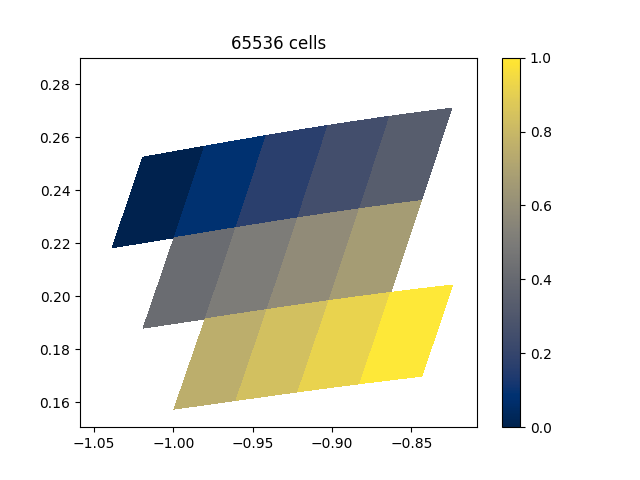

In [ ]:
## Deine domains:
level = 4
domains = {
    "domain01": {
        "cells": [slice(4766237 + (16**level) * 13, 4766237 + (16**level) * 14),
                  slice(4766237 + (16**level) * 14, 4766237 + (16**level) * 15),
                  slice(4766237 + (16**level) * 15, 4766237 + (16**level) * 16),
                  slice(4766237 + (16**level) * 16, 4766237 + (16**level) * 17),
                  slice(6034032 + (16**level) * 13, 6034032 + (16**level) * 14),
                  slice(6034032 + (16**level) * 14, 6034032 + (16**level) * 16),
                  slice(6034032 + (16**level) * 16, 6034032 + (16**level) * 17),
                  ],
    },
    "domain02": {
        "cells": [slice(6034032 + (16**level) * 1, 6034032 + (16**level) * 2),
                  slice(6034032 + (16**level) * 2, 6034032 + (16**level) * 3),
                  slice(6034032 + (16**level) * 3, 6034032 + (16**level) * 4),
                    slice(6034032 + (16**level) * 4, 6034032 + (16**level) * 5),
                    slice(6034032 + (16**level) * 9, 6034032 + (16**level) * 10),
                    slice(6034032 + (16**level) * 10, 6034032 + (16**level) * 11),
                    slice(6034032 + (16**level) * 11, 6034032 + (16**level) * 12),
                    slice(6034032 + (16**level) * 12, 6034032 + (16**level) * 13),
                  ]
    },
    "domain03": {
        "cells": [
            slice(10468729 + (16**level) * 12, 10468729 + (16**level) * 13),
            slice(10468729 + (16**level) * 13, 10468729 + (16**level) * 14),
            slice(10468729 + (16**level) * 14, 10468729 + (16**level) * 15),
            slice(10468729 + (16**level) * 15, 10468729 + (16**level) * 16),
            slice(3344491 + (16**level) * 10, 3344491 + (16**level) * 11),
            slice(3344491 + (16**level) * 11, 3344491 + (16**level) * 12),
            slice(3344491 + (16**level) * 9, 3344491 + (16**level) * 10),
            slice(3344491 + (16**level) * 8, 3344491 + (16**level) * 9),
        ]
    },
    "domain04": {
        "cells": [
            slice(10468729 + (16**level) * 4, 10468729 + (16**level) * 5),
            slice(10468729 + (16**level) * 5, 10468729 + (16**level) * 6),
            slice(10468729 + (16**level) * 6, 10468729 + (16**level) * 7),
            slice(10468729 + (16**level) * 7, 10468729 + (16**level) * 8),
            slice(10468729 + (16**level) * 8, 10468729 + (16**level) * 9),
            slice(10468729 + (16**level) * 9, 10468729 + (16**level) * 10),
            slice(10468729 + (16**level) * 10, 10468729 + (16**level) * 11),
            slice(10468729 + (16**level) * 11, 10468729 + (16**level) * 12),
        ]
    },
    "domain05": {
        "cells": [
            slice(10468729 + (16**level) * 0, 10468729 + (16**level) * 1),
            slice(10468729 + (16**level) * 1, 10468729 + (16**level) * 2),
            slice(10468729 + (16**level) * 2, 10468729 + (16**level) * 3),
            slice(10468729 + (16**level) * 3, 10468729 + (16**level) * 4),
            slice(7869523 + (16**level) *16, 7869523 + (16**level) *17),
            slice(7869523 + (16**level) *17, 7869523 + (16**level) *18),
            slice(7869523 + (16**level) *18, 7869523 + (16**level) *19),
            slice(7869523 + (16**level) *19, 7869523 + (16**level) *20),
        ]
    },
    "domain06": {
        "cells": [
            slice(6034032 + (16**level) * 5, 6034032 + (16**level) * 6),
            slice(6034032 + (16**level) * 6, 6034032 + (16**level) * 7),
            slice(6034032 + (16**level) * 7, 6034032 + (16**level) * 8),
            slice(6034032 + (16**level) * 8, 6034032 + (16**level) * 9),
            slice(4766237 + (16**level) * 9, 4766237 + (16**level) * 10),
            slice(4766237 + (16**level) * 10, 4766237 + (16**level) * 11),
            slice(4766237 + (16**level) * 11, 4766237 + (16**level) * 12),
            slice(4766237 + (16**level) * 12, 4766237 + (16**level) * 13),
        ]
    },
    "domain07": {
        "cells": [
            slice(3344491 + (16**level) * 2, 3344491 + (16**level) * 3),
            slice(3344491 + (16**level) * 3, 3344491 + (16**level) * 4),
            slice(3344491 + (16**level) * 1, 3344491 + (16**level) * 2),
            slice(3344491 + (16**level) * 0, 3344491 + (16**level) * 1),
            slice(3344491 + (16**level) * 12, 3344491 + (16**level) * 13),
            slice(3344491 + (16**level) * 13, 3344491 + (16**level) * 14),
            slice(3344491 + (16**level) * 14, 3344491 + (16**level) * 15),
            slice(3344491 + (16**level) * 15, 3344491 + (16**level) * 16),
        ]
    },
    "domain08": {
        "cells": [
            slice(3344491 + (16**level) * 5, 3344491 + (16**level) * 6),
            slice(3344491 + (16**level) * 4, 3344491 + (16**level) * 5),
            slice(3344491 + (16**level) * 6, 3344491 + (16**level) * 7),
            slice(3344491 + (16**level) * 7, 3344491 + (16**level) * 8),
            slice(10468729 + (16**level) * 16, 10468729 + (16**level) * 17),
            slice(10468729 + (16**level) * 17, 10468729 + (16**level) * 18),
            slice(10468729 + (16**level) * 18, 10468729 + (16**level) * 19),
            slice(10468729 + (16**level) * 19, 10468729 + (16**level) * 20),
        ]
    },
    "domain09": {
        "cells": [
            slice(7869523 + (16**level) * 4, 7869523 + (16**level) * 5),
            slice(7869523 + (16**level) * 5, 7869523 + (16**level) * 6),
            slice(7869523 + (16**level) * 6, 7869523 + (16**level) * 7),
            slice(7869523 + (16**level) * 7, 7869523 + (16**level) * 8),
            slice(7869523 + (16**level) * 8, 7869523 + (16**level) * 9),
            slice(7869523 + (16**level) * 9, 7869523 + (16**level) * 10),
            slice(7869523 + (16**level) * 10, 7869523 + (16**level) * 11),
            slice(7869523 + (16**level) * 11, 7869523 + (16**level) * 12),
        ]
    },
    "domain10": {
        "cells": [
            slice(2484500 + (16**level) * 8, 2484500 + (16**level) * 9),
            slice(2484500 + (16**level) * 9, 2484500 + (16**level) * 10),
            slice(2484500 + (16**level) * 10, 2484500 + (16**level) * 11),
            slice(2484500 + (16**level) * 11, 2484500 + (16**level) * 12),
            slice(4419422 + (16**level) * 0, 4419422 + (16**level) * 1),
            slice(4419422 + (16**level) * 1, 4419422 + (16**level) * 2),
            slice(4419422 + (16**level) * 2, 4419422 + (16**level) * 3),
            slice(4419422 + (16**level) * 3, 4419422 + (16**level) * 4),
        ]
    },
    "domain11": {
        "cells": [
            slice(2484500 + (16**level) * 0, 2484500 + (16**level) * 1),
            slice(2484500 + (16**level) * 1, 2484500 + (16**level) * 2),
            slice(2484500 + (16**level) * 2, 2484500 + (16**level) * 3),
            slice(2484500 + (16**level) * 3, 2484500 + (16**level) * 4),
            slice(2484500 + (16**level) * 4, 2484500 + (16**level) * 5),
            slice(2484500 + (16**level) * 5, 2484500 + (16**level) * 6),
            slice(2484500 + (16**level) * 6, 2484500 + (16**level) * 7),
            slice(2484500 + (16**level) * 7, 2484500 + (16**level) * 8),
        ]
    },
    "domain12": {
        "cells": [
            slice(7869523 + (16**level) *24, 7869523 + (16**level) *25),
            slice(7869523 + (16**level) *25, 7869523 + (16**level) *26),
            slice(7869523 + (16**level) *26, 7869523 + (16**level) *27),
            slice(7869523 + (16**level) *27, 7869523 + (16**level) *28),
            slice(4766237 + (16**level) * 1, 4766237 + (16**level) * 2),
            slice(4766237 + (16**level) * 2, 4766237 + (16**level) * 3),
            slice(4766237 + (16**level) * 3, 4766237 + (16**level) * 4),
            slice(4766237 + (16**level) * 4, 4766237 + (16**level) * 5),
        ]
    },
    "domain13": {
        "cells": [
            slice(7869523 + (16**level) * 20, 7869523 + (16**level) * 21),
            slice(7869523 + (16**level) * 21, 7869523 + (16**level) * 22),
            slice(7869523 + (16**level) * 22, 7869523 + (16**level) * 23),
            slice(7869523 + (16**level) * 23, 7869523 + (16**level) * 24),
            slice(9851502 + (16**level) * 0, 9851502 + (16**level) * 1),
            slice(9851502 + (16**level) * 1, 9851502 + (16**level) * 2),
            slice(9851502 + (16**level) * 2, 9851502 + (16**level) * 3),
            slice(9851502 + (16**level) * 3, 9851502 + (16**level) * 4),
        ]
    },
}

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize the figure and axis
fig, ax = plt.subplots()
nb_triangles_per_level = 16
triangles_to_show = 2

# Lists to accumulate triangles and colors
all_triangles = []
all_colors = []
all_vocs = []
colors_ = np.linspace(0,1,len(domains.keys()))

for i, domain in enumerate(sorted(domains.keys())):
    print(domain)
    cells = domains[domain]["cells"]
    color = np.random.rand()
    for j, common_triangle in enumerate(cells):
        sg1 = grid.isel(cell=common_triangle)
        if i == 0:
            cells_per_triangle = len(sg1.cell)
        voc = sg1.vertex_of_cell - 1
        all_vocs.append(voc)
        colors = np.full(len(voc[0,:]),colors_[i])
        all_colors.extend(colors)

all_vocs = np.hstack(all_vocs)

combined_triang = tri.Triangulation(grid.vlon, grid.vlat, triangles=all_vocs.T)

# Plot all triangles at once
tripcolor = ax.tripcolor(combined_triang, all_colors, cmap='cividis', vmin=0, vmax=1)
plt.colorbar(tripcolor, ax=ax)
plt.title(f"{cells_per_triangle} cells")

plt.show()


In [18]:
grid.isel(cell=domains["domain03"]["cells"][0])

<xarray.Dataset> Size: 5GB
Dimensions:                        (nc: 2, edge: 17693237, vertex: 5901162,
                                    cell: 65536, ne: 6, nv: 3, no: 4,
                                    max_chdom: 1, cell_grf: 14, edge_grf: 24,
                                    vert_grf: 13)
Coordinates:
    clat                           (cell) float64 524kB ...
    clon                           (cell) float64 524kB ...
    elat                           (edge) float64 142MB ...
    elon                           (edge) float64 142MB ...
    vlat                           (vertex) float64 47MB 0.2022 ... 0.1669
    vlon                           (vertex) float64 47MB -0.8202 ... -1.047
Dimensions without coordinates: nc, edge, vertex, cell, ne, nv, no, max_chdom,
                                cell_grf, edge_grf, vert_grf
Data variables: (12/51)
    adjacent_cell_of_edge          (nc, edge) int32 142MB ...
    cartesian_x_vertices           (vertex) float64 47MB ...
    cartesian_y_vertices           (vertex) float64 47MB ...
    cartesian_z_vertices           (vertex) float64 47MB ...
    cell_area                      (cell) float64 524kB ...
    cell_area_p                    (cell) float64 524kB ...
    ...                             ...
    vertex_of_cell                 (nv, cell) int32 786kB 400069 ... 402208
    vertices_of_vertex             (ne, vertex) int32 142MB ...
    vlat_vertices                  (vertex, ne) float64 283MB ...
    vlon_vertices                  (vertex, ne) float64 283MB ...
    zonal_normal_dual_edge         (edge) float64 142MB ...
    zonal_normal_primal_edge       (edge) float64 142MB ...
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          3c7523ba-f78c-c23e-6654-012805ba3300
    uuidOfParHGrid:       6b59890b-99f3-939b-e76a-0a3ad2e43140

In [39]:
domains_indices = {}

for domain in domains.keys():
    slices = domains[domain]["cells"]
    domains_indices[domain] = np.hstack([np.arange(s.start, s.stop) for s in slices]).tolist()

In [41]:
import json
with open("domains_indices.json", "w") as f:
    json.dump(domains_indices, f)